In [1]:
import tensorflow as tf
import numpy as np

# Hypothesis and Cost
# Simplifed hypothesis
# Cost function

# Cost function in pur Python

* bias를 가중치에 포함시키고
* cost 함수를 일정 범위에서 직접 구해 cost를 최소화하는 지점(w)을 찾는다

In [2]:
x = [1,2,3,4,5]
y = [1,2,3,4,5]

def cost_func(w, x, y):
    c = 0
    for i in range(len(x)):
        c += (w * x[i] - y[i]) ** 2
        return c / len(x)
for feed_w in np.linspace(-3, 5, num=15):
    curr_cost = cost_func(feed_w, x, y)
    print("{:6.3f}| {:10.5f}".format(feed_w, curr_cost))

-3.000|    3.20000
-2.429|    2.35102
-1.857|    1.63265
-1.286|    1.04490
-0.714|    0.58776
-0.143|    0.26122
 0.429|    0.06531
 1.000|    0.00000
 1.571|    0.06531
 2.143|    0.26122
 2.714|    0.58776
 3.286|    1.04490
 3.857|    1.63265
 4.429|    2.35102
 5.000|    3.20000


# Cost function in TensorFlow

* bias를 가중치에 포함시키고
* cost 함수를 일정 범위에서 직접 구해 cost를 최소화하는 지점(w)을 찾는다. 

In [16]:
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])

def cost_func(w, x, y):
    hypothesis = x * w
    return tf.reduce_mean(tf.square(hypothesis - y))

w_values = np.linspace(-3, 5, num=15)
cost_values= []

for feed_w in w_values:
    curr_cost = cost_func(feed_w, x, y)
    cost_values.append(curr_cost)
    print("{:6.3f}|{:10.5f}".format(feed_w, curr_cost))

-3.000| 176.00000
-2.429| 129.30612
-1.857|  89.79592
-1.286|  57.46939
-0.714|  32.32653
-0.143|  14.36735
 0.429|   3.59184
 1.000|   0.00000
 1.571|   3.59184
 2.143|  14.36735
 2.714|  32.32653
 3.286|  57.46939
 3.857|  89.79592
 4.429| 129.30612
 5.000| 176.00000


In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

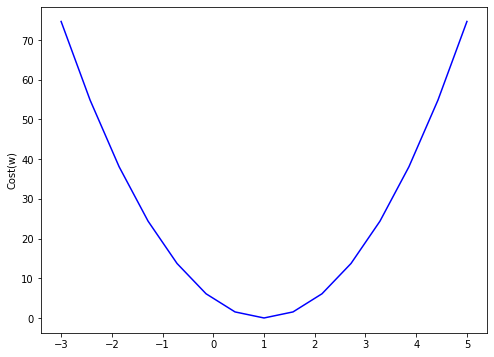

In [8]:
import matplotlib.pyplot as plt

plt.plot(w_values, cost_values, "b")
plt.ylabel('Cost(w)')
plt.show()

# Gradient descent

* bias를 가중치에 포함시키고
* 각 지점의 기울기를 구하고 
* learning rate(alpha)를 통해 각 지점의 위치를 업데이트하여
* 기울기가 0인 cost를 최소화하는 지점(w)을 찾는다 

In [12]:
# for reproducibility
tf.random.set_seed(0)

In [14]:
x = [1., 2., 3., 4.]
y = [1., 3., 5., 7.]

w = tf.Variable(tf.random.normal((1,), -100., 100.))

for step in range(300):
    hypothesis = w * x
    cost = tf.reduce_mean(tf.square(hypothesis - y))
    
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(w,x)-y, x))
    descent = w - tf.multiply(alpha, gradient)
    w.assign(descent)
    
    if step % 10 == 0:
        print('{:5}|{:10.4f}|{:10.6f}'.format(step, cost.numpy(), w.numpy()[0]))

    0|  189.2715|  6.311418
   10|   39.9350|  3.796668
   20|    8.5299|  2.643447
   30|    1.9254|  2.114601
   40|    0.5365|  1.872082
   50|    0.2444|  1.760866
   60|    0.1830|  1.709865
   70|    0.1701|  1.686477
   80|    0.1674|  1.675751
   90|    0.1668|  1.670833
  100|    0.1667|  1.668577
  110|    0.1667|  1.667543
  120|    0.1667|  1.667069
  130|    0.1667|  1.666851
  140|    0.1667|  1.666751
  150|    0.1667|  1.666705
  160|    0.1667|  1.666685
  170|    0.1667|  1.666675
  180|    0.1667|  1.666670
  190|    0.1667|  1.666668
  200|    0.1667|  1.666667
  210|    0.1667|  1.666667
  220|    0.1667|  1.666667
  230|    0.1667|  1.666667
  240|    0.1667|  1.666667
  250|    0.1667|  1.666667
  260|    0.1667|  1.666667
  270|    0.1667|  1.666667
  280|    0.1667|  1.666667
  290|    0.1667|  1.666667


In [15]:
print(5.0 * w)
print(2.5 * w)

tf.Tensor([8.333338], shape=(1,), dtype=float32)
tf.Tensor([4.166669], shape=(1,), dtype=float32)
